In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('spalling.xlsx', index_col=0)

In [3]:
df_spall = df.loc[df['spalling']!=0]
df_spall = df_spall.loc[df['firecurve']=='std']
df_spall = df_spall.drop('firecurve', axis=1)
df_spall = df_spall.drop('weightloss', axis=1)
df_spall = df_spall.drop('time', axis=1)
df_spall = df_spall.drop('Age', axis=1)
df_use = df_spall

In [4]:
df_use.head()

,spalling,load,stress,moisture,Compressive strength
name,,,,,
1.1,20,624,6.24,4.5,63
1.4,21,617,6.17,4.5,63
1.5,17,634,6.34,4.5,63
2.1,32,622,6.22,4.1,61
2.4,19,616,6.16,4.1,61


In [5]:
X = df_use.drop('spalling', axis = 1)
y = df_use['spalling']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
LOWER_ALPHA = 0.1
MIDDLE_ALPHA = 0.5
UPPER_ALPHA = 0.9

In [8]:
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

In [9]:
# Fit models
lower_model.fit(X_train, y_train)
mid_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)
# Record actual values on test set
predictions = pd.DataFrame(y_test)
# Predict
predictions['lower'] = lower_model.predict(X_test)
predictions['mid'] = mid_model.predict(X_test)
predictions['upper'] = upper_model.predict(X_test)

In [10]:
predictions = pd.DataFrame(y_test)

In [11]:
predictions['upper'] = upper_model.predict(X_test)
X_test[:1]

,load,stress,moisture,Compressive strength
name,,,,
15.6,703,7.03,6,70


In [12]:
d = {'y_test': y_test, 'predictions': predictions['upper']}
df_show = pd.DataFrame(data=d)

In [13]:
df_show

,y_test,predictions
name,,
15.6,49,50.053302
3.3,33,63.154794
16.1,24,37.391755
10.3,18,37.197875
10.18,21,54.339227
46.23,36,45.863749
46.16b,56,59.757617
12.3,37,28.148596
46.18,52,61.030591


In [14]:
df_show['under'] = df_show['predictions']>df_show['y_test']

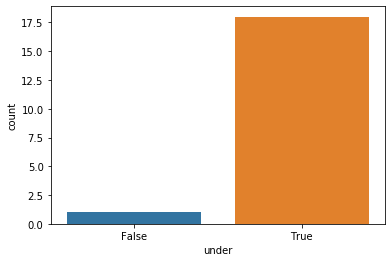

In [19]:
ax = sns.countplot(x="under", data=df_show)

In [16]:
d = {'load': [601], 'stress': [6], 'moisture': [5.1], 'Compressive strength': [60]}
d_test = pd.DataFrame(data=d)

print('Your slab will with a 90 percent certainty not spall more than: ')  
print(str(int(upper_model.predict(d_test))) + ' mm')

Your slab will with a 90 percent certainty not spall more than: 
63 mm


In [17]:
r2_score(predictions['spalling'], predictions['upper'])

-1.8949429262366229